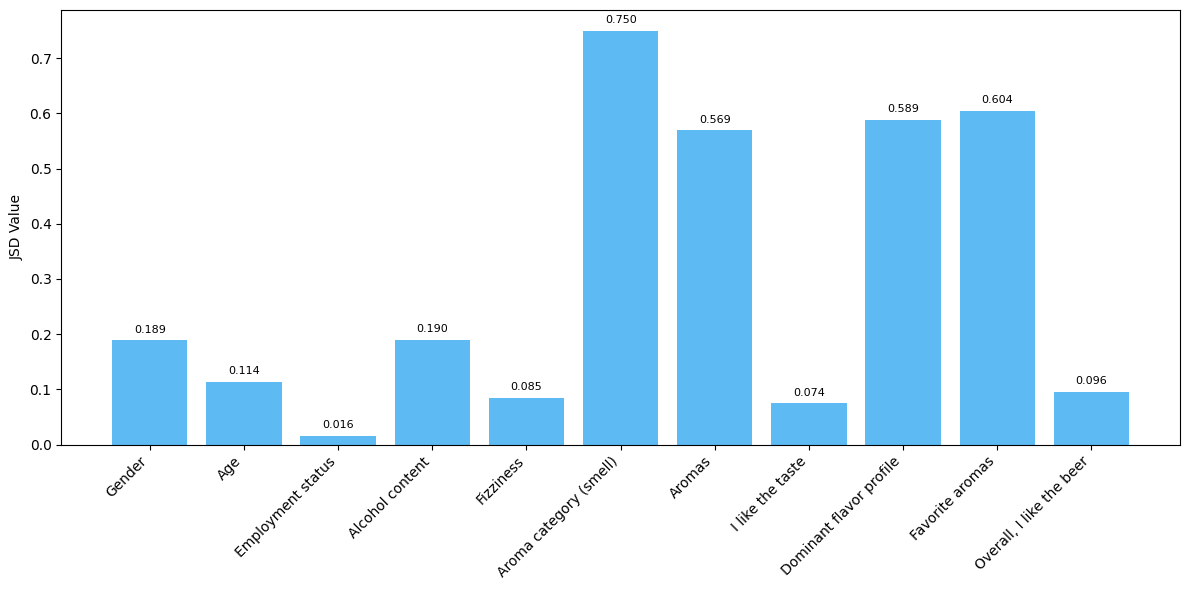

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# === Pfad zur CSV-Datei ===
csv_path = "results.csv"

# CSV einlesen
df = pd.read_csv(csv_path)

# Ersten Eintrag der Spalte "jsd" holen
jsd_raw = df.loc[0, "jsd"]

# np.float64 durch float ersetzen für Parsing
jsd_clean = jsd_raw.replace("np.float64", "float")

# In Dictionary umwandeln
jsd_dict = eval(jsd_clean)

# Mapping Deutsch → Englisch
translations = {
    "Geschlecht": "Gender",
    "Alter": "Age",
    "Berufssituation": "Employment status",
    "Alkoholgehalt": "Alcohol content",
    "Spritzigkeit": "Fizziness",
    "Aromakategorie (Geruch)": "Aroma category (smell)",
    "Aromen": "Aromas",
    "Geschmack gefaellt mir": "I like the taste",
    "Dominante Geschmacksrichtung": "Dominant flavor profile",
    "Lieblingsaromen": "Favorite aromas",
    "Insgesamt gefaellt mir das Bier": "Overall, I like the beer"
}

# Keys übersetzen
translated_jsd = {translations.get(k, k): v for k, v in jsd_dict.items()}

# Barplot mit festem Blauton
plt.figure(figsize=(12, 6))
bars = plt.bar(translated_jsd.keys(), translated_jsd.values(), color='#5EBAF2')

# Wertbeschriftungen
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f"{yval:.3f}",
             ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45, ha='right')
plt.ylabel("JSD Value")
#plt.title("Jensen-Shannon Divergence (JSD)")
plt.tight_layout()
# === Plot speichern ===
output_filename = "Jensen-Shannon_Divergence.png"
plt.savefig(output_filename, dpi=300)

# Plot anzeigen
plt.show()

In [6]:
import os
print("Aktuelles Arbeitsverzeichnis:", os.getcwd())

Aktuelles Arbeitsverzeichnis: C:\Users\Power\PycharmProjects\GLLM\src\visualisation


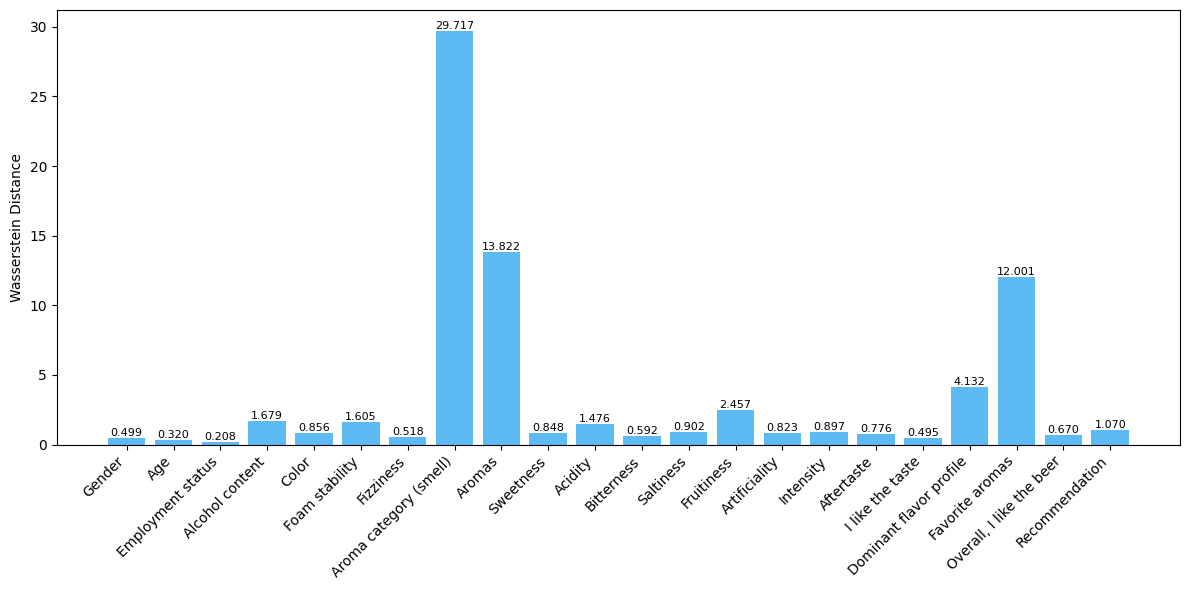

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# === Pfad zur CSV-Datei ===
csv_path = "results.csv"

# CSV einlesen
df = pd.read_csv(csv_path)

# Ersten Eintrag der Spalte "wasserstein" holen
raw_wasserstein = df.loc[0, "wasserstein"]

# np.float64 durch float ersetzen für Parsing
clean_wasserstein = raw_wasserstein.replace("np.float64", "float")

# In Dictionary umwandeln
wasserstein_dict = eval(clean_wasserstein)

# Übersetzungen Deutsch → Englisch
translations = {
    "Geschlecht": "Gender",
    "Alter": "Age",
    "Berufssituation": "Employment status",
    "Alkoholgehalt": "Alcohol content",
    "Farbe": "Color",
    "Schaumfestigkeit": "Foam stability",
    "Spritzigkeit": "Fizziness",
    "Aromakategorie (Geruch)": "Aroma category (smell)",
    "Aromen": "Aromas",
    "Süße": "Sweetness",
    "SueÂ§e": "Sweetness",  # Encoding-Fallback
    "Saeure": "Acidity",
    "Bitterkeit": "Bitterness",
    "Salzigkeit": "Saltiness",
    "Fruchtigkeit": "Fruitiness",
    "Kuenstlichkeit": "Artificiality",
    "Intensitaet": "Intensity",
    "Nachhall": "Aftertaste",
    "Geschmack gefaellt mir": "I like the taste",
    "Dominante Geschmacksrichtung": "Dominant flavor profile",
    "Lieblingsaromen": "Favorite aromas",
    "Insgesamt gefaellt mir das Bier": "Overall, I like the beer",
    "Weiterempfehlung": "Recommendation"
}

# Keys übersetzen
translated_wasserstein = {translations.get(k, k): v for k, v in wasserstein_dict.items()}

# Barplot erstellen mit Blauton
plt.figure(figsize=(12, 6))
bars = plt.bar(translated_wasserstein.keys(), translated_wasserstein.values(), color="#5EBAF2")

# Wertbeschriftungen hinzufügen
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f"{yval:.3f}",
             ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45, ha='right')
plt.ylabel("Wasserstein Distance")
#plt.title("Wasserstein Distance per Feature")
plt.tight_layout()
# === Plot speichern ===
output_filename = "wasserstein_distance_per_feature.png"
plt.savefig(output_filename, dpi=300)

# Plot anzeigen
plt.show()

In [22]:
import pandas as pd

# CSV-Datei laden
df = pd.read_csv("results2.csv")

# Nur Adult-Datensätze auswählen
adult_df = df[df["dataset"] == "Adult"].copy()

# Differenzen berechnen
adult_df["accuracy_diff"] = adult_df["accuracy_real"] - adult_df["accuracy_synth"]
adult_df["f1_diff"] = adult_df["f1_real"] - adult_df["f1_synth"]
adult_df["auc_diff"] = adult_df["auc_real"] - adult_df["auc_synth"]

# Relevante Spalten extrahieren
result = adult_df[[
    "model", "synth_method",
    "accuracy_real", "accuracy_synth", "accuracy_diff",
    "f1_real", "f1_synth", "f1_diff",
    "auc_real", "auc_synth", "auc_diff"
]]

# Adult

C:\Users\Power\AppData\Local\Temp\ipykernel_4296\4043519816.py:55: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


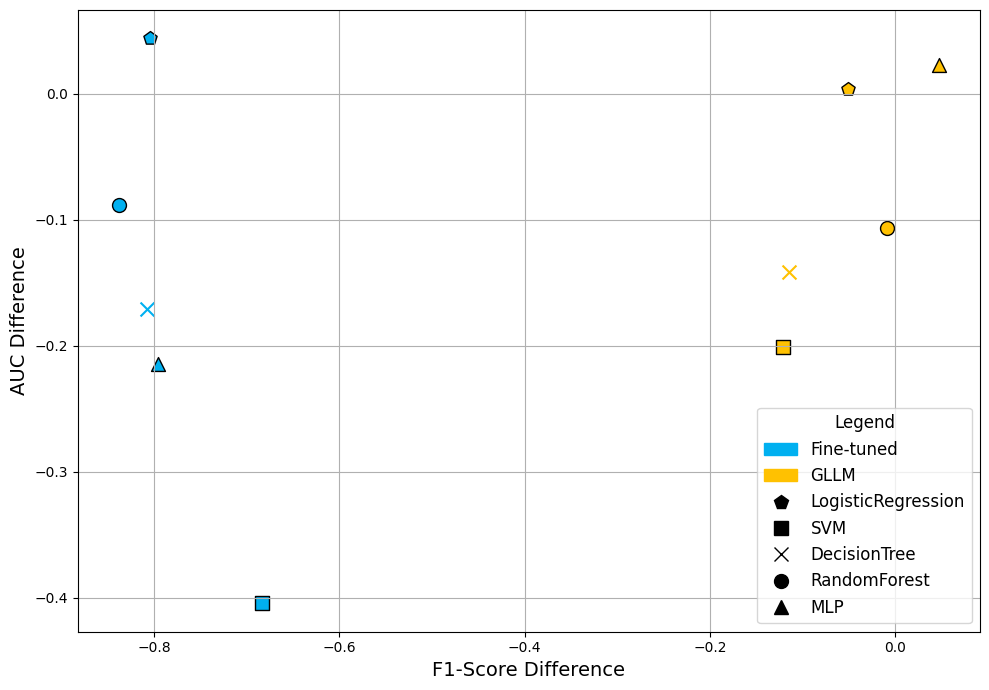

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

# Sicherstellen, dass der Download-Ordner existiert
os.makedirs("download", exist_ok=True)

# CSV-Datei laden
df = pd.read_csv("metadata_modified3.csv")

# Nur Adult-Datensätze auswählen
adult_df = df[df["dataset"] == "Adult"].copy()

# Differenzen berechnen
adult_df["accuracy_diff"] = adult_df["accuracy_synth"]- adult_df["accuracy_real"]
adult_df["f1_diff"] = adult_df["f1_synth"] - adult_df["f1_real"]
adult_df["auc_diff"] = adult_df["auc_synth"] - adult_df["auc_real"]

# Relevante Spalten extrahieren
result = adult_df[[
    "model", "synth_method",
    "accuracy_real", "accuracy_synth", "accuracy_diff",
    "f1_real", "f1_synth", "f1_diff",
    "auc_real", "auc_synth", "auc_diff"
]]

# Marker für Modelle definieren
model_markers = {
    "LogisticRegression": "p",
    "SVM": "s",
    "DecisionTree": "x",
    "RandomForest": "o",
    "MLP": "^"
}

# Farben für Synthese-Methoden festlegen
# Farben für Synthese-Methoden festlegen (angepasst)
method_colors = {
    "finetuned": "#00B0F0",  # Blau (0, 176, 240)
    "gllm": "#FFC101"        # Orange (255, 193, 1)
}


# Plot erzeugen
fig, ax = plt.subplots(figsize=(10, 7))

# Weißer Hintergrund
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Punkte plotten
for _, row in result.iterrows():
    ax.scatter(
        row["f1_diff"],
        row["auc_diff"],
        c=method_colors.get(row["synth_method"], "gray"),
        marker=model_markers.get(row["model"], "o"),
        s=100,
        edgecolor='black'
    )

# Achsenbeschriftung mit größerer Schrift
ax.set_xlabel("F1-Score Difference", fontsize=14)
ax.set_ylabel("AUC Difference", fontsize=14)
ax.grid(True)

# Legende (Farben = Methoden, Marker = Modelle)
legend_methods = [
    mpatches.Patch(color=method_colors["finetuned"], label="Fine-tuned"),
    mpatches.Patch(color=method_colors["gllm"], label="GLLM")
]

legend_models = [
    mlines.Line2D([], [], color='black', marker=marker, linestyle='None',
                  markersize=10, label=model)
    for model, marker in model_markers.items()
]

ax.legend(handles=legend_methods + legend_models, title="Legend", loc="best", fontsize=12, title_fontsize=12)

# Plot speichern
plt.tight_layout()
plt.savefig("download/Adult_f1_auc_diff_plot.png", dpi=300)

# Plot anzeigen
plt.show()


# Credit Card



📋 F1-Score & AUC Differenzen für CreditCard:
             model synth_method   f1_diff  auc_diff
      DecisionTree         gllm -0.001662 -0.004928
               SVM         gllm  0.000000  0.000000
      RandomForest         gllm  0.040792 -0.007152
LogisticRegression         gllm  0.000000  0.000000
               MLP         gllm -0.003971  0.149417
      DecisionTree    finetuned -0.579884 -0.154947
               SVM    finetuned -0.030831  0.025604
      RandomForest    finetuned -0.411876 -0.279300
LogisticRegression    finetuned -0.102024 -0.089554
               MLP    finetuned  0.197455 -0.042193


C:\Users\Power\AppData\Local\Temp\ipykernel_4296\3305934598.py:48: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


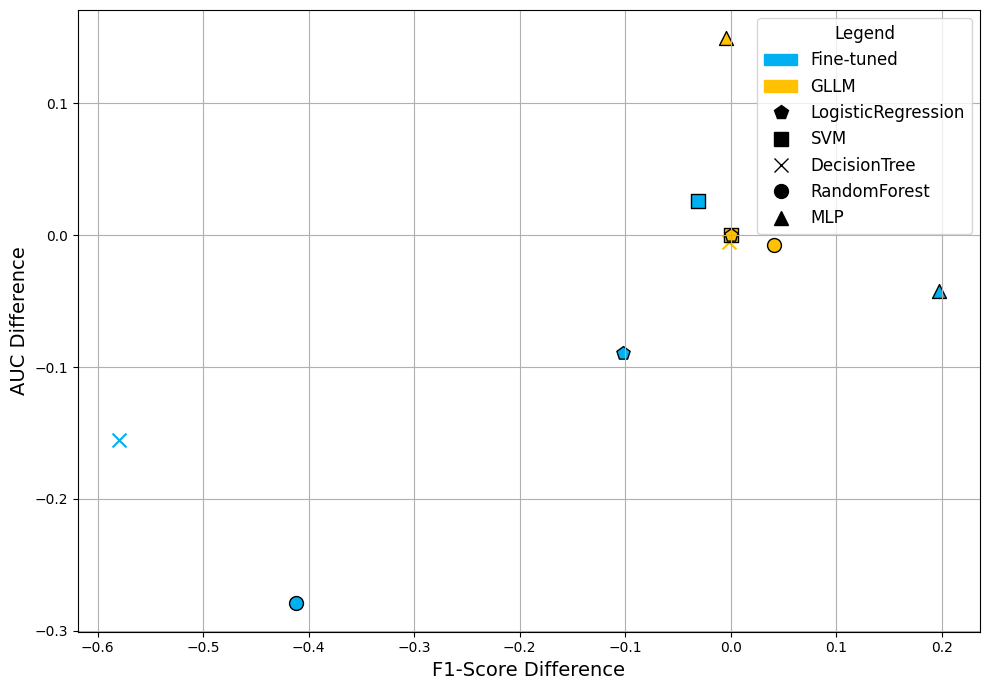

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

# Sicherstellen, dass der Download-Ordner existiert
os.makedirs("download", exist_ok=True)

# CSV-Datei laden

# Farben für Synthese-Methoden festlegen (angepasst)
method_colors = {
    "finetuned": "#00B0F0",  # Blau (0, 176, 240)
    "gllm": "#FFC101"        # Orange (255, 193, 1)
}

# Marker für Modelle definieren
model_markers = {
    "LogisticRegression": "p",
    "SVM": "s",
    "DecisionTree": "x",
    "RandomForest": "o",
    "MLP": "^"
}

# Nur CreditCard-Datensätze auswählen
credit_df = df[df["dataset"] == "CreditCardData"].copy()

# Differenzen berechnen
credit_df["f1_diff"] = credit_df["f1_synth"] - credit_df["f1_real"]
credit_df["auc_diff"] =  credit_df["auc_synth"] - credit_df["auc_real"]

# Relevante Spalten extrahieren
credit_result = credit_df[["model", "synth_method", "f1_diff", "auc_diff"]]

# --- Werte ausgeben ---
print("\n📋 F1-Score & AUC Differenzen für CreditCard:")
print(credit_result.to_string(index=False))

# Plot erzeugen
fig, ax = plt.subplots(figsize=(10, 7))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Punkte plotten
for _, row in credit_result.iterrows():
    ax.scatter(
        row["f1_diff"],
        row["auc_diff"],
        c=method_colors.get(row["synth_method"], "gray"),
        marker=model_markers.get(row["model"], "o"),
        s=100,
        edgecolor='black'
    )

# Achsen und Legende
ax.set_xlabel("F1-Score Difference", fontsize=14)
ax.set_ylabel("AUC Difference", fontsize=14)
ax.grid(True)

legend_methods = [
    mpatches.Patch(color=method_colors["finetuned"], label="Fine-tuned"),
    mpatches.Patch(color=method_colors["gllm"], label="GLLM")
]
legend_models = [
    mlines.Line2D([], [], color='black', marker=marker, linestyle='None',
                  markersize=10, label=model)
    for model, marker in model_markers.items()
]
ax.legend(handles=legend_methods + legend_models, title="Legend", loc="best", fontsize=12, title_fontsize=12)

# Speichern und anzeigen
plt.tight_layout()
plt.savefig("download/creditcard_f1_auc_diff.png", dpi=300)
plt.show()


C:\Users\Power\AppData\Local\Temp\ipykernel_4296\176001394.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


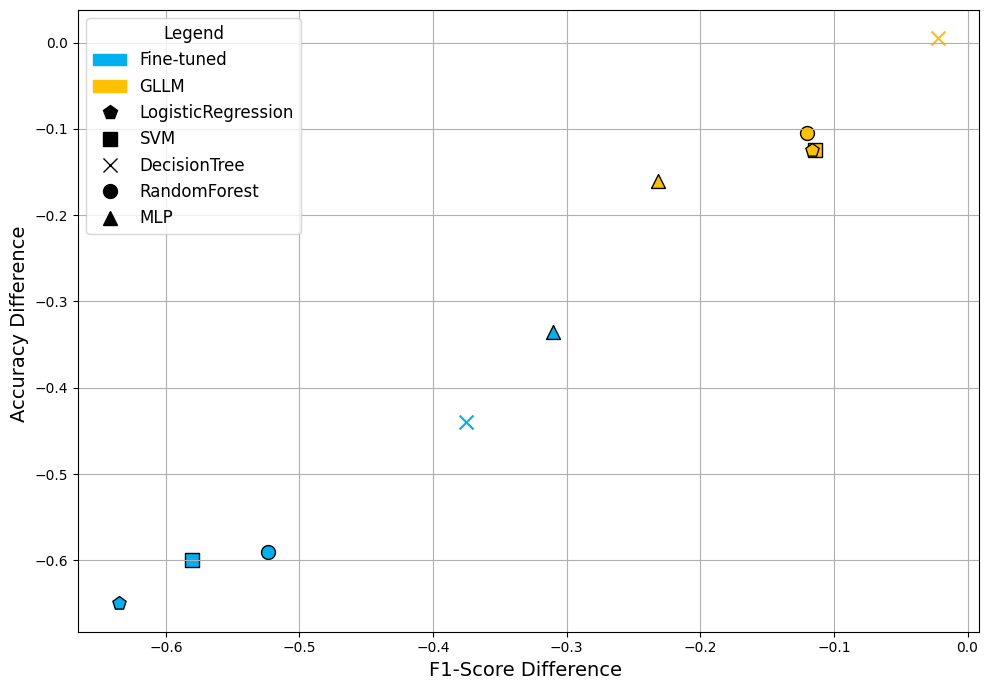

In [12]:
# Nur Covertype-Datensätze auswählen
covertype_df = df[df["dataset"] == "Covertype"].copy()

# Differenzen berechnen
covertype_df["f1_diff"] = covertype_df["f1_synth"] - covertype_df["f1_real"]
covertype_df["accuracy_diff"] = covertype_df["accuracy_synth"] - covertype_df["accuracy_real"]

# Relevante Spalten extrahieren
covertype_result = covertype_df[["model", "synth_method", "f1_diff", "accuracy_diff"]]

# Plot erzeugen
fig, ax = plt.subplots(figsize=(10, 7))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Punkte plotten
for _, row in covertype_result.iterrows():
    ax.scatter(
        row["f1_diff"],
        row["accuracy_diff"],
        c=method_colors.get(row["synth_method"], "gray"),
        marker=model_markers.get(row["model"], "o"),
        s=100,
        edgecolor='black'
    )

# Achsen und Legende
ax.set_xlabel("F1-Score Difference ", fontsize=14)
ax.set_ylabel("Accuracy Difference ", fontsize=14)
ax.grid(True)

legend_methods = [
    mpatches.Patch(color=method_colors["finetuned"], label="Fine-tuned"),
    mpatches.Patch(color=method_colors["gllm"], label="GLLM")
]
legend_models = [
    mlines.Line2D([], [], color='black', marker=marker, linestyle='None',
                  markersize=10, label=model)
    for model, marker in model_markers.items()
]
ax.legend(handles=legend_methods + legend_models, title="Legend", loc="best", fontsize=12, title_fontsize=12)

# Speichern und anzeigen
plt.tight_layout()
plt.savefig("download/covertype_f1_accuracy_diff.png", dpi=300)
plt.show()


In [23]:
# Differenzen berechnen (synth - real)
df["accuracy_diff"] = df["accuracy_synth"] - df["accuracy_real"]
df["f1_diff"] = df["f1_synth"] - df["f1_real"]

# AUC nur für Adult & CreditCardData
auc_df = df[df["dataset"].isin(["Adult", "CreditCardData"])].copy()
auc_df["auc_diff"] = auc_df["auc_synth"] - auc_df["auc_real"]

# Gruppieren nach Synthese-Methode
accuracy_avg = df.groupby("synth_method")["accuracy_diff"].mean()
f1_avg = df.groupby("synth_method")["f1_diff"].mean()
auc_avg = auc_df.groupby("synth_method")["auc_diff"].mean()

# Ergebnisse anzeigen
print("🔍 Durchschnittliche Differenzen nach Synthese-Methode (synth - real):\n")

for method in ["finetuned", "gllm"]:
    acc = accuracy_avg.get(method, float('nan'))
    f1 = f1_avg.get(method, float('nan'))
    auc = auc_avg.get(method, float('nan'))

    print(f"🧠 Methode: {method}")
    print(f"   Accuracy: {acc:.4f}")
    print(f"   F1-Score: {f1:.4f}")
    print(f"   AUC (nur Adult & CreditCardData): {auc:.4f}\n")


🔍 Durchschnittliche Differenzen nach Synthese-Methode (synth - real):

🧠 Methode: finetuned
   Accuracy: -0.4893
   F1-Score: -0.4854
   AUC (nur Adult & CreditCardData): -0.1374

🧠 Methode: gllm
   Accuracy: -0.0687
   F1-Score: -0.0544
   AUC (nur Adult & CreditCardData): -0.0285



In [28]:
import pandas as pd
import numpy as np
import ast

# === CSV einlesen und sicherstellen, dass jsd & wasserstein als String behandelt werden ===
df = pd.read_csv("metadata.csv", dtype={"jsd": str, "wasserstein": str})

# === Funktion zum Parsen & Mittelwertberechnen mit Debug-Ausgabe ===
def parse_and_average_dict_string(s, label=""):
    if pd.isna(s) or not isinstance(s, str) or s.strip() == "":
        print(f"🚫 Leerer oder ungültiger Eintrag bei {label}")
        return np.nan
    try:
        # Debug
        print(f"\n🔍 Parsing {label}: {s[:100]}{'...' if len(s) > 100 else ''}")

        # np.float64(...) entfernen
        clean_str = s.replace("np.float64", "")

        # Sicher in dict parsen
        parsed = ast.literal_eval(clean_str)

        # Nur float-Werte extrahieren
        values = [float(v) for v in parsed.values()]

        # Debug
        print(f"   ➕ {len(values)} Werte gefunden, Durchschnitt = {np.mean(values):.6f}")

        return np.mean(values)
    except Exception as e:
        print(f"❌ Fehler beim Parsen von {label}: {e}")
        return np.nan

# === Parser anwenden ===
df["jsd_avg"] = df["jsd"].apply(lambda x: parse_and_average_dict_string(x, "jsd"))
df["wasserstein_avg"] = df["wasserstein"].apply(lambda x: parse_and_average_dict_string(x, "wasserstein"))

# === corr_diff sicherstellen ===
df["corr_diff"] = pd.to_numeric(df["corr_diff"], errors="coerce")

# === Gruppieren nach Synthese-Methode ===
grouped = df.groupby("synth_method")[["jsd_avg", "wasserstein_avg", "corr_diff"]].mean()

# === Ergebnisse anzeigen ===
print("\n📊 Durchschnittlicher JSD / Wasserstein / Corr-Diff pro Synthese-Methode:\n")
for method in ["finetuned", "gllm"]:
    if method in grouped.index:
        row = grouped.loc[method]
        print(f"🧠 Methode: {method}")
        print(f"   ⭕ JSD (Ø über Dict):           {row['jsd_avg']:.6f}")
        print(f"   🌊 Wasserstein (Ø über Dict):  {row['wasserstein_avg']:.6f}")
        print(f"   🔗 Corr. Diff.:                {row['corr_diff']:.6f}\n")
    else:
        print(f"⚠️ Keine Daten für Methode: {method}")



🔍 Parsing jsd: {'age': np.float64(0.09076853765511156), 'workclass': np.float64(0.09167606425281535), 'fnlwgt': np....
   ➕ 14 Werte gefunden, Durchschnitt = 0.174008

🔍 Parsing jsd: {'age': np.float64(0.09076853765511156), 'workclass': np.float64(0.09167606425281535), 'fnlwgt': np....
   ➕ 14 Werte gefunden, Durchschnitt = 0.174008

🔍 Parsing jsd: {'age': np.float64(0.09076853765511156), 'workclass': np.float64(0.09167606425281535), 'fnlwgt': np....
   ➕ 14 Werte gefunden, Durchschnitt = 0.174008

🔍 Parsing jsd: {'age': np.float64(0.09076853765511156), 'workclass': np.float64(0.09167606425281535), 'fnlwgt': np....
   ➕ 14 Werte gefunden, Durchschnitt = 0.174008

🔍 Parsing jsd: {'age': np.float64(0.09076853765511156), 'workclass': np.float64(0.09167606425281535), 'fnlwgt': np....
   ➕ 14 Werte gefunden, Durchschnitt = 0.174008

🔍 Parsing jsd: {'age': np.float64(0.07506155757909921), 'workclass': np.float64(0.9999999999999999), 'fnlwgt': np.f...
   ➕ 14 Werte gefunden, Durchschnitt = 0

In [29]:
import pandas as pd
import numpy as np
import ast

# === 1. CSV einlesen und sicherstellen, dass 'jsd' und 'wasserstein' als Strings gelesen werden ===
df = pd.read_csv("metadata.csv", dtype={"jsd": str, "wasserstein": str})

# === 2. Funktion zum Parsen & Mittelwertberechnen ===
def parse_and_average_dict_string(s):
    if pd.isna(s) or not isinstance(s, str) or s.strip() == "":
        return np.nan
    try:
        clean_str = s.replace("np.float64", "")  # np.float64 entfernen
        parsed = ast.literal_eval(clean_str)     # Sicheres Parsen
        values = [float(v) for v in parsed.values()]
        return np.mean(values)
    except Exception as e:
        print(f"❌ Fehler beim Parsen: {e}")
        return np.nan

# === 3. Neue Spalten berechnen: Ø jsd & Ø wasserstein über Dictionary-Werte ===
df["jsd_avg"] = df["jsd"].apply(parse_and_average_dict_string)
df["wasserstein_avg"] = df["wasserstein"].apply(parse_and_average_dict_string)

# === 4. Ergebnis für erste Zeile anzeigen ===
print("\n🔍 Durchschnittswerte aus erster Zeile:")
print(f"🔵 JSD (Ø):         {df.loc[0, 'jsd_avg']:.6f}")
print(f"🟡 Wasserstein (Ø): {df.loc[0, 'wasserstein_avg']:.6f}")



🔍 Durchschnittswerte aus erster Zeile:
🔵 JSD (Ø):         0.174008
🟡 Wasserstein (Ø): 3045.487768
